In [591]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [592]:
# 1000 lines
data = pd.read_csv('data.tsv', delimiter='\t', nrows=1000)
data = data.drop('id', axis=1)

print('Raw data:')
data.head()

Raw data:


,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [593]:
# First line before clean
print('Sample review before clean:\n')
print(data['review'][1])

Sample review before clean:

\The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \"critics\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \"critics\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \"critics\" perceive to be its shortcomings."


In [594]:
# Clean function
def clean(text):
    # Remove html tags
    no_html = BeautifulSoup(text).get_text()

    # Convert to lowercase
    lower = no_html.lower()

    # Replace anything that is not a letter to a space, ignore case
    only_alphabet = re.sub('[^a-z]', ' ', lower)

    # Remove excessive spaces
    return re.sub('\s+', ' ', only_alphabet).strip()


# Clean review column
data['review'] = data['review'].apply(clean)

print('Cleaned data:')
data.head()


Cleaned data:


,sentiment,review
0,1,with all this stuff going down at the moment w...
1,1,the classic war of the worlds by timothy hines...
2,0,the film starts with a manager nicholas bell g...
3,0,it must be assumed that those who praised this...
4,1,superbly trashy and wondrously unpretentious s...


In [595]:
print('Sample review after clean:\n')
print(data['review'][1])

Sample review after clean:

the classic war of the worlds by timothy hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate h g wells classic book mr hines succeeds in doing so i and those who watched his film with me appreciated the fact that it was not the standard predictable hollywood fare that comes out every year e g the spielberg version with tom cruise that had only the slightest resemblance to the book obviously everyone looks for different things in a movie those who envision themselves as amateur critics look only to criticize everything they can others rate a movie on more important bases like being entertained which is why most people never agree with the critics we enjoyed the effort mr hines put into being faithful to h g wells classic novel and we found it to be very entertaining this made it easy to overlook what the critics perceive to be its shortcomings


In [596]:
# Use review column as features
X = data['review']

# Use sentiment column as target
y = data['sentiment']

# Split data into 75% for training, 25%% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750,)
(250,)
(750,)
(250,)


In [597]:
# Instantiate Count Vectorizer
cv = CountVectorizer()

# Learns vocabulary from training data
cv.fit(X_train)

# Create bag of words from training data using learned vocabulary
X_train_bow = cv.transform(X_train)

print('Bag of Words from training data:')
pd.DataFrame(X_train_bow.toarray(), columns=cv.get_feature_names_out())

Bag of Words from training data:


,aag,abandon,abandoned,abandoning,abbey,abbott,abc,abdicating,abducted,abductee,...,zoe,zombie,zombies,zone,zoom,zooms,zukhov,zulu,zuniga,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [598]:
# Instantiate Multinomial Naive Bayes model
nb = MultinomialNB()

# Train model with bag of words and sentiment from training data
nb.fit(X_train_bow, y_train)

MultinomialNB()

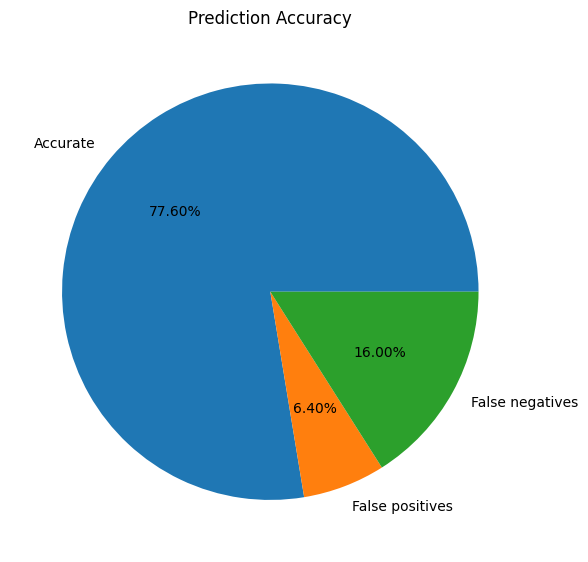

In [615]:
# Create bag of words from testing data using learned vocabulary
X_test_bow = cv.transform(X_test)

# Predict sentiment using trained model
y_test_predict = nb.predict(X_test_bow)

# Prediction accuracy pie chart
plt.figure(figsize=(6, 6))
plt.gcf().set_dpi(100)
plt.title('Prediction Accuracy')
plt.pie([
    len(X_test[y_test_predict == y_test]),
    len(X_test[y_test_predict > y_test]),
    len(X_test[y_test_predict < y_test])
], labels=[
    'Accurate',
    'False positives',
    'False negatives'
], autopct='%.2f%%')
plt.ylabel('')
plt.show()
